In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt     

In [65]:
df = pd.read_csv("C:/Users/ACER/Downloads/SampleData.csv")
df.head() 

,Index,CustomerID,Gender,Age,Income(in K),Spending score
0,0,1,Male,24,20,11
1,1,2,Female,27,40,30
2,2,3,Female,55,70,60
3,3,4,Female,29,23,25
4,4,5,Male,41,30,50


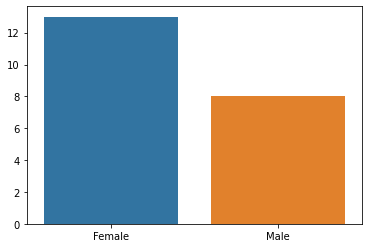

In [66]:
genders = df.Gender.value_counts()
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [67]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]
x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

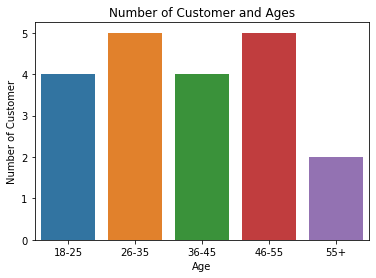

In [68]:
sns.barplot(x=x, y=y)
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

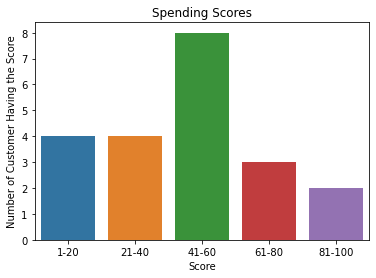

In [69]:
ss1_20 = df["Spending score"][(df["Spending score"] >= 1) & (df["Spending score"] <= 20)]
ss21_40 = df["Spending score"][(df["Spending score"] >= 21) & (df["Spending score"] <= 40)]
ss41_60 = df["Spending score"][(df["Spending score"] >= 41) & (df["Spending score"] <= 60)]
ss61_80 = df["Spending score"][(df["Spending score"] >= 61) & (df["Spending score"] <= 80)]
ss81_100 = df["Spending score"][(df["Spending score"] >= 81) & (df["Spending score"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

sns.barplot(x=ssx, y=ssy)
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

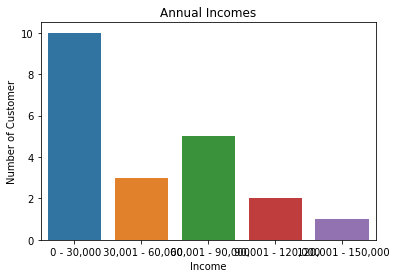

In [70]:
ai0_30 = df["Income(in K)"][(df["Income(in K)"] >= 0) & (df["Income(in K)"] <= 30)]
ai31_60 = df["Income(in K)"][(df["Income(in K)"] >= 31) & (df["Income(in K)"] <= 60)]
ai61_90 = df["Income(in K)"][(df["Income(in K)"] >= 61) & (df["Income(in K)"] <= 90)]
ai91_120 = df["Income(in K)"][(df["Income(in K)"] >= 91) & (df["Income(in K)"] <= 120)]
ai121_150 = df["Income(in K)"][(df["Income(in K)"] >= 121) & (df["Income(in K)"] <= 150)]

aix = [" 0 - 30,000", " 30,001 - 60,000", " 60,001 - 90,000", " 90,001 - 120,000", " 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

sns.barplot(x=aix, y=aiy)
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

In [71]:
from sklearn.cluster import KMeans

In [72]:
df1=df[["Income(in K)","Spending score"]]
df1.head()

,Income(in K),Spending score
0,20,11
1,40,30
2,70,60
3,23,25
4,30,50


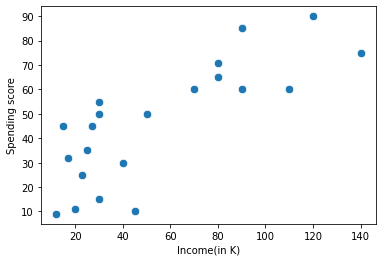

In [73]:
sns.scatterplot(x = 'Income(in K)',y = 'Spending score',  data = df1  ,s = 70 )
plt.xlabel('Income(in K)')
plt.ylabel('Spending score') 
plt.show()

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


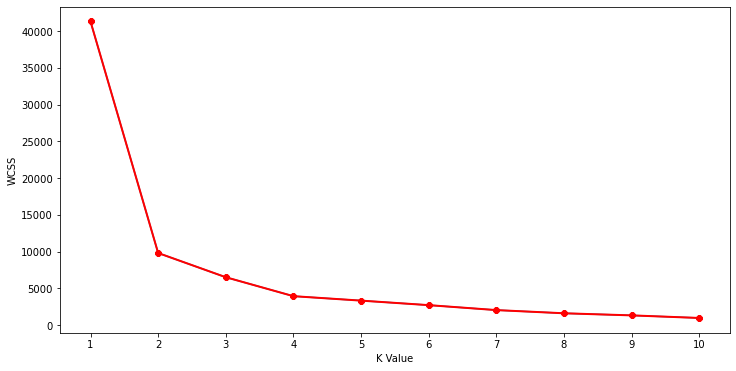

In [74]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df1)
    wcss.append(km.inertia_)
    
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

<ipython-input-75-4aa373218f3c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["label"] = y


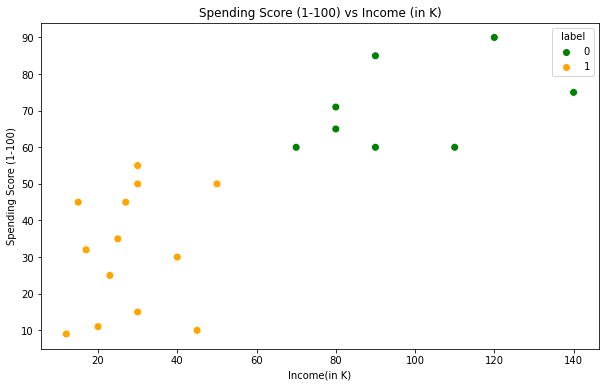

In [75]:
km1=KMeans(n_clusters=2)
km1.fit(df1)
y=km1.predict(df1)
df1["label"] = y

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Income(in K)',y = 'Spending score',hue="label",  
                 palette=['green','orange'], legend='full',data = df1,s=60)
plt.xlabel('Income(in K)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Income (in K)')
plt.show()

In [76]:
df1=df[["Age","Spending score"]]
df1.head()

,Age,Spending score
0,24,11
1,27,30
2,55,60
3,29,25
4,41,50


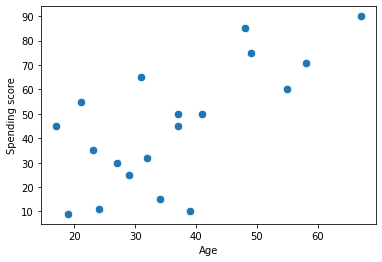

In [77]:
sns.scatterplot(x = 'Age',y = 'Spending score',  data = df1  ,s = 70 )
plt.xlabel('Age')
plt.ylabel('Spending score') 
plt.show()

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


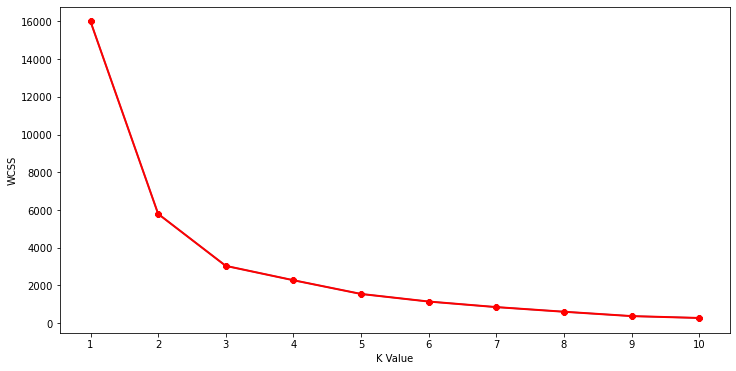

In [78]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df1)
    wcss.append(km.inertia_)
    
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

<ipython-input-79-747b6a205269>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["label"] = y


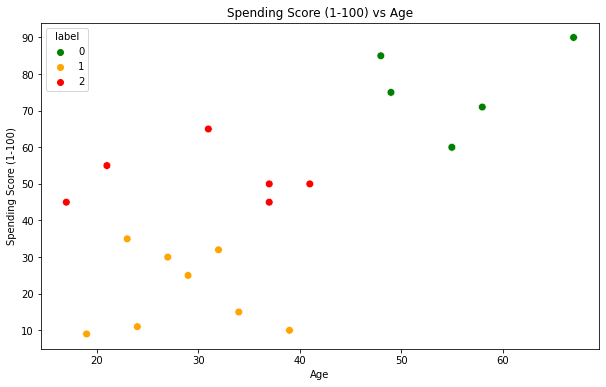

In [79]:
km1=KMeans(n_clusters=3)
km1.fit(df1)
y=km1.predict(df1)
df1["label"] = y

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Age',y = 'Spending score',hue="label",  
                 palette=['green','orange','red'],data = df1,s=60)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Age')
plt.show()